쿵푸

In [36]:
from wordcloud import WordCloud, STOPWORDS

In [37]:
import numpy as np
from PIL import Image

In [38]:
with open('./data/james.txt') as f :
    text = f.read()
text[:100],len(text)

('Legend tells of a legendary warrior,\nwhose kung fu skills\nwere the stuff of legend.\nHe travelled the',
 30509)

In [39]:
# 이미지 마스킹 
james_mask = np.array(Image.open( './data/James.jpg' ))
james_mask.shape

(171, 296, 3)

In [40]:
# 시각화 준비
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# 한글 처리 
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')

def initKoreaFontLoad() :
    plt.rcParams['axes.unicode_minus'] = False
    os_name = platform.system()
    
    if os_name == 'Darwin' :
        # MacOS, Linux
        rc('font', family = 'AppleGothic')
    elif os_name == 'Windows' :
        # window10 ~ window server
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        print(font_name)
        rc('font', family = font_name)
    else :
        print('알 수 없는 시스템')
        pass
initKoreaFontLoad()

Malgun Gothic


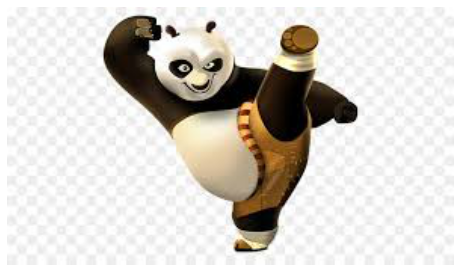

In [42]:
#1. 이미지 그리기 
# 사이즈 고정 
plt.figure(figsize=(8,8))
plt.imshow(james_mask,cmap = plt.cm.gray, interpolation = 'bilinear')
# 축을 제거
plt.axis('off')
plt.show()

In [43]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [44]:
# 단어로 사용되지 않는 영어문자들을 모아둔것 : STOPWORDS
stopwords = set( STOPWORDS )
stopwords.add( 'said' )
stopwords.add( ' ' )
len(stopwords)

192

In [45]:
wc = WordCloud( background_color='white', 
           max_words=2000, 
           mask=james_mask, 
           stopwords=stopwords)

In [46]:
# 워드 카운트 수행 
wc = wc.generate(text)

In [47]:
len(wc.words_),type(wc.words_)

(892, dict)

In [48]:
wc.words_

{'Master': 1.0,
 'Dragon Warrior': 1.0,
 'Oh': 0.9743589743589743,
 'will': 0.9230769230769231,
 'know': 0.8461538461538461,
 'going': 0.7435897435897436,
 'now': 0.6410256410256411,
 'Po': 0.6153846153846154,
 'Yes': 0.6153846153846154,
 'wait': 0.5641025641025641,
 'one': 0.5641025641025641,
 'Tai Lung': 0.5641025641025641,
 'Panda': 0.5384615384615384,
 'Okay': 0.5384615384615384,
 'Shifu': 0.5128205128205128,
 'never': 0.46153846153846156,
 'noodle': 0.46153846153846156,
 'go': 0.4358974358974359,
 'Kung Fu': 0.4358974358974359,
 'stop': 0.41025641025641024,
 'Hey': 0.38461538461538464,
 'Sorry': 0.38461538461538464,
 'Aah': 0.38461538461538464,
 'come': 0.38461538461538464,
 'see': 0.358974358974359,
 'Ahh': 0.358974358974359,
 'Ya': 0.358974358974359,
 'Look': 0.358974358974359,
 'good': 0.358974358974359,
 'ha ha': 0.358974358974359,
 'nothing': 0.3333333333333333,
 'thought': 0.3333333333333333,
 'Well': 0.3333333333333333,
 'time': 0.3333333333333333,
 'Master Shifu': 0.333333

In [49]:
wc.words_
'''
{'Master': 1.0,
 'Dragon Warrior': 1.0,
 'Oh': 0.9743589743589743,
 'will': 0.9230769230769231,
 ...
'''

"\n{'Master': 1.0,\n 'Dragon Warrior': 1.0,\n 'Oh': 0.9743589743589743,\n 'will': 0.9230769230769231,\n ...\n"

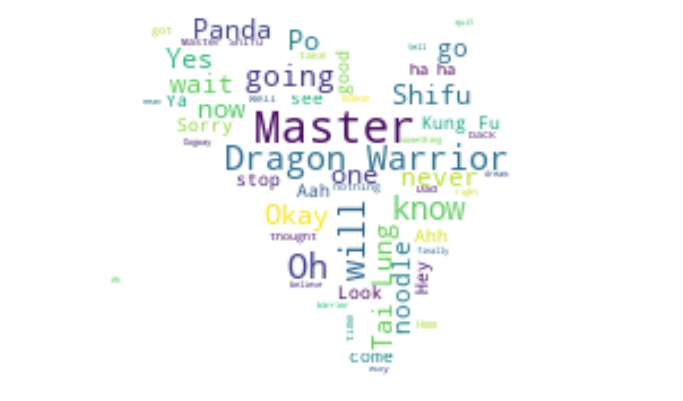

In [50]:
plt.figure(figsize=(12,12))
plt.imshow( wc, interpolation='bilinear' )
plt.axis('off')
plt.show()